# Análisis de Distribución Frecuencial

Este notebook implementa un análisis completo de la distribución de frecuencias en señales de vibración, permitiendo:

1. Visualizar la distribución de FFTs de múltiples ensayos
2. Analizar bandas de frecuencia específicas
3. Detectar y caracterizar picos significativos
4. Comparar grupos de ensayos (normales vs anormales)

## Configuración Inicial

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Agregar el directorio raíz al path
project_root = Path().absolute().parent
sys.path.append(str(project_root))

from vibration_analysis.utils.frequency_analysis_utils import FrequencyDistributionAnalyzer

## Carga de Datos

Cargaremos los ensayos normales para analizar su distribución frecuencial.

In [2]:
# Configurar el analizador
fs = 1600.0  # Frecuencia de muestreo
analyzer = FrequencyDistributionAnalyzer(fs=fs)

# Cargar señales normales
normal_dir = os.path.join(project_root, 'data', 'normales', '2000_1')
analyzer.load_signals_from_directory(normal_dir)

print(f"Se cargaron {len(analyzer.signals)} señales para análisis")

Se cargaron 28 señales con 3 canales
Se cargaron 3 señales para análisis


## Visualización de la Distribución FFT

Visualizaremos la distribución de FFTs de todos los ensayos, mostrando:
- Media de las FFTs
- Rango entre percentiles 25-75
- Rango completo (min-max)

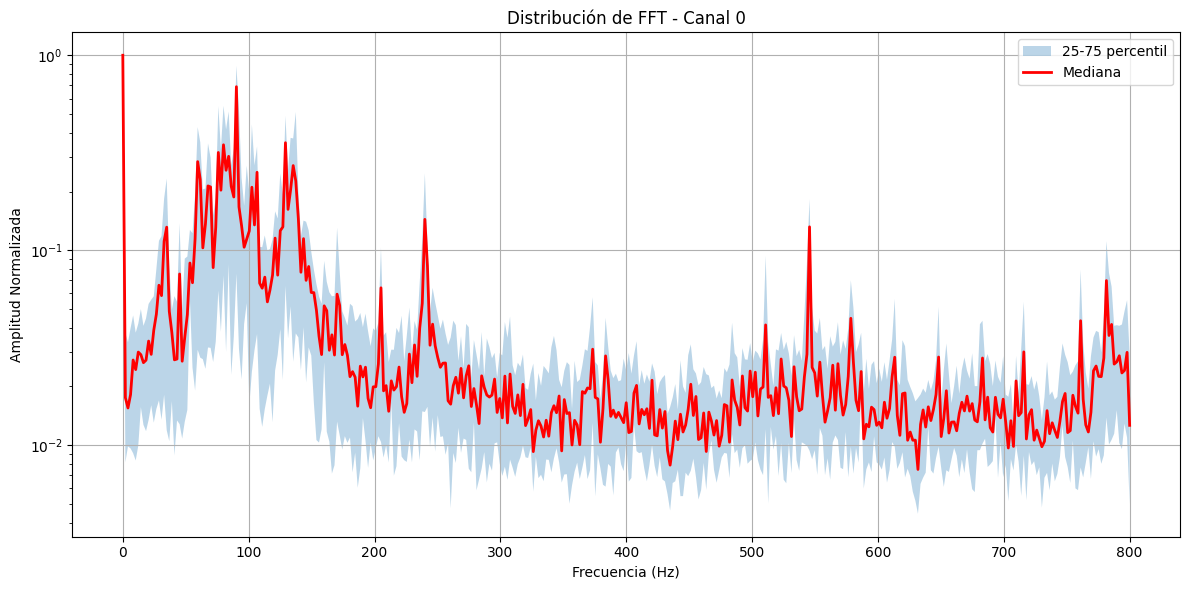

In [3]:
# Visualización básica
analyzer.plot_fft_distribution(
    normalize=True  # Normalizar para mejor comparación
)
plt.show()

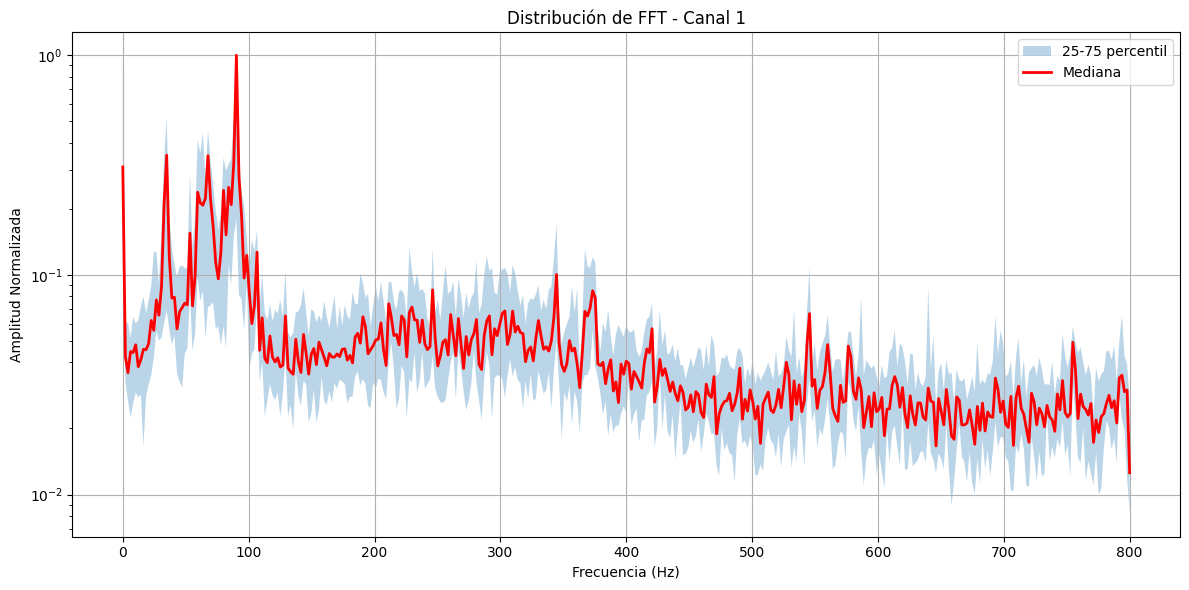

In [4]:
# Selección de otro canal
analyzer.set_current_channel(1)
analyzer.plot_fft_distribution(
    normalize=True  # Normalizar para mejor comparación
)
plt.show()

## Análisis Interactivo

Interfaz interactiva para explorar diferentes rangos de frecuencia y opciones de visualización. Decidir rangos de frecuencias relevantes, etc.

In [5]:
interactive_plot = analyzer.create_interactive_plot()
display(interactive_plot)

## Detección de Picos Significativos

Identificación de las frecuencias dominantes en los ensayos.

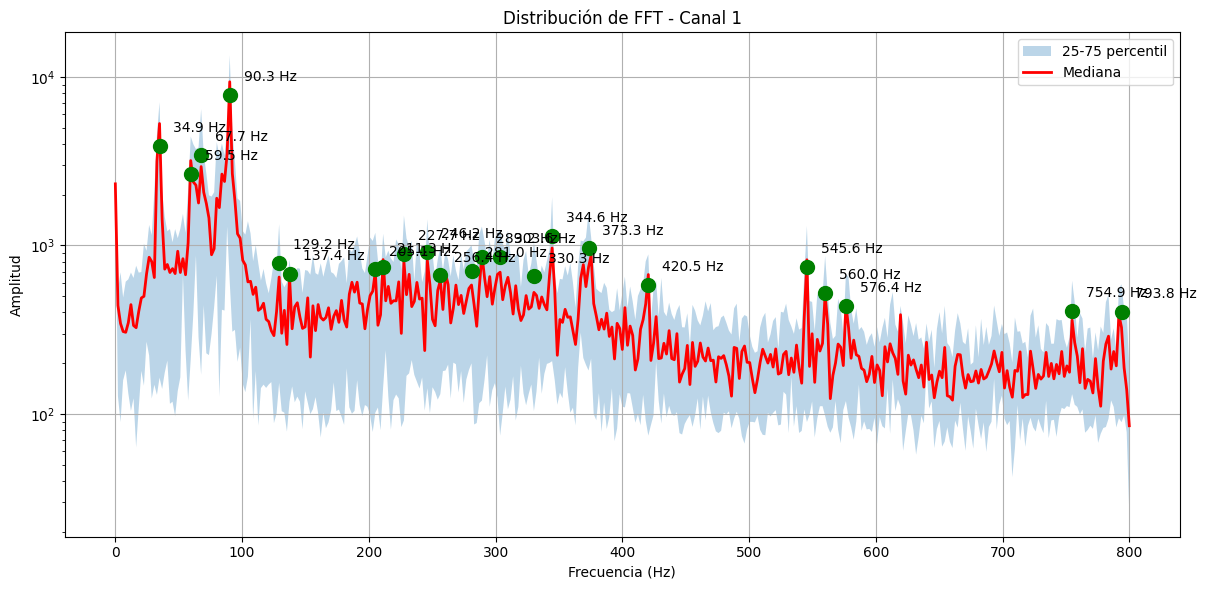


Frecuencias dominantes detectadas:
- 34.9 Hz (magnitud: 3.88e+03)
- 59.5 Hz (magnitud: 2.65e+03)
- 67.7 Hz (magnitud: 3.45e+03)
- 90.3 Hz (magnitud: 7.82e+03)
- 129.2 Hz (magnitud: 7.88e+02)
- 137.4 Hz (magnitud: 6.78e+02)
- 205.1 Hz (magnitud: 7.21e+02)
- 211.3 Hz (magnitud: 7.49e+02)
- 227.7 Hz (magnitud: 8.96e+02)
- 246.2 Hz (magnitud: 9.14e+02)
- 256.4 Hz (magnitud: 6.64e+02)
- 281.0 Hz (magnitud: 7.09e+02)
- 289.2 Hz (magnitud: 8.54e+02)
- 303.6 Hz (magnitud: 8.59e+02)
- 330.3 Hz (magnitud: 6.55e+02)
- 344.6 Hz (magnitud: 1.15e+03)
- 373.3 Hz (magnitud: 9.60e+02)
- 420.5 Hz (magnitud: 5.80e+02)
- 545.6 Hz (magnitud: 7.44e+02)
- 560.0 Hz (magnitud: 5.20e+02)
- 576.4 Hz (magnitud: 4.38e+02)
- 754.9 Hz (magnitud: 4.07e+02)
- 793.8 Hz (magnitud: 4.05e+02)


In [6]:
# Detectar picos significativos
peaks = analyzer.detect_peaks(prominence=200, width=1)

# Visualizar con picos marcados
fig = analyzer.plot_fft_distribution()
for freq, mag in peaks:
    plt.plot(freq, mag, 'go', markersize=10)
    plt.annotate(f'{freq:.1f} Hz', 
                 xy=(freq, mag), 
                 xytext=(10, 10),
                 textcoords='offset points')
plt.show()

print("\nFrecuencias dominantes detectadas:")
for freq, mag in peaks:
    print(f"- {freq:.1f} Hz (magnitud: {mag:.2e})")

## Comparación con Ensayos Anormales

Comparación de la distribución de frecuencias entre ensayos normales y anormales.

Se cargaron 44 señales con 3 canales


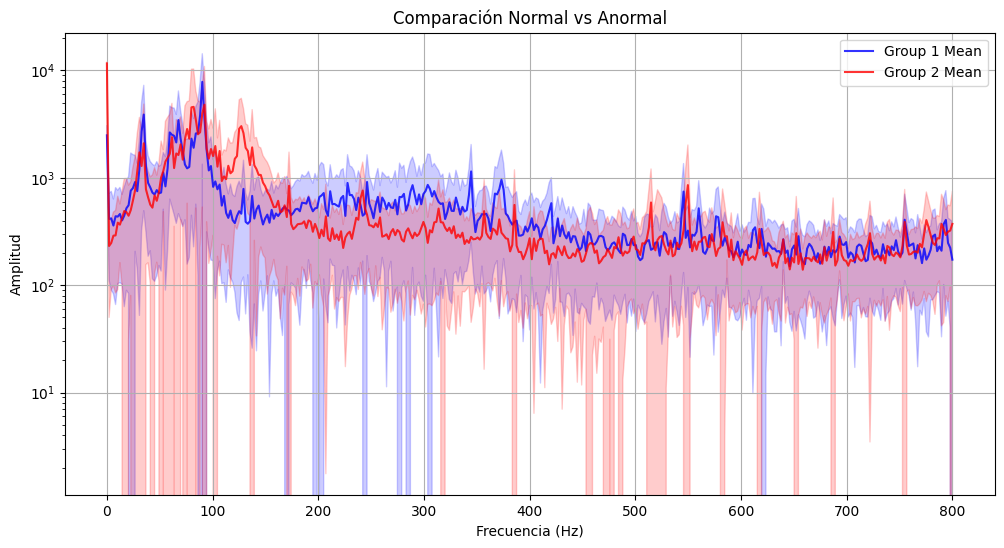

In [7]:
# Cargar señales anormales
abnormal_analyzer = FrequencyDistributionAnalyzer(fs=fs)
abnormal_dir = os.path.join(project_root, 'data', 'anormales', '2000_2')
abnormal_analyzer.load_signals_from_directory(abnormal_dir)

# Comparar distribuciones
analyzer.compare_groups(
    abnormal_analyzer,
    title="Comparación Normal vs Anormal"
)
plt.show()

Se cargaron 43 señales con 3 canales


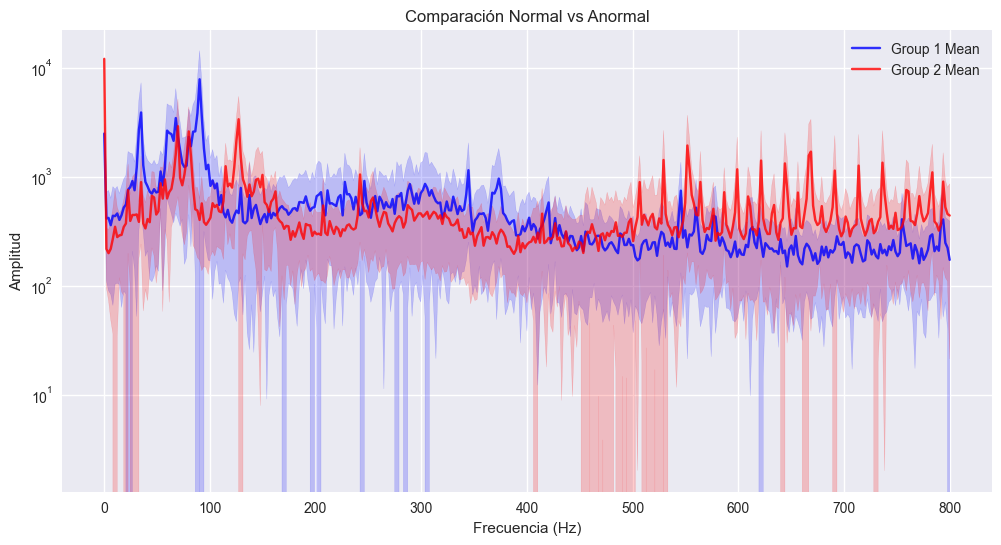

In [10]:
# Cargar señales anormales
abnormal_analyzer = FrequencyDistributionAnalyzer(fs=fs)
abnormal_dir = os.path.join(project_root, 'data', 'sin_correa', '2000_3')
abnormal_analyzer.load_signals_from_directory(abnormal_dir)

# Comparar distribuciones
analyzer.compare_groups(
    abnormal_analyzer,
    title="Comparación Normal vs Anormal"
)
plt.show()

Se cargaron 43 señales con 3 canales


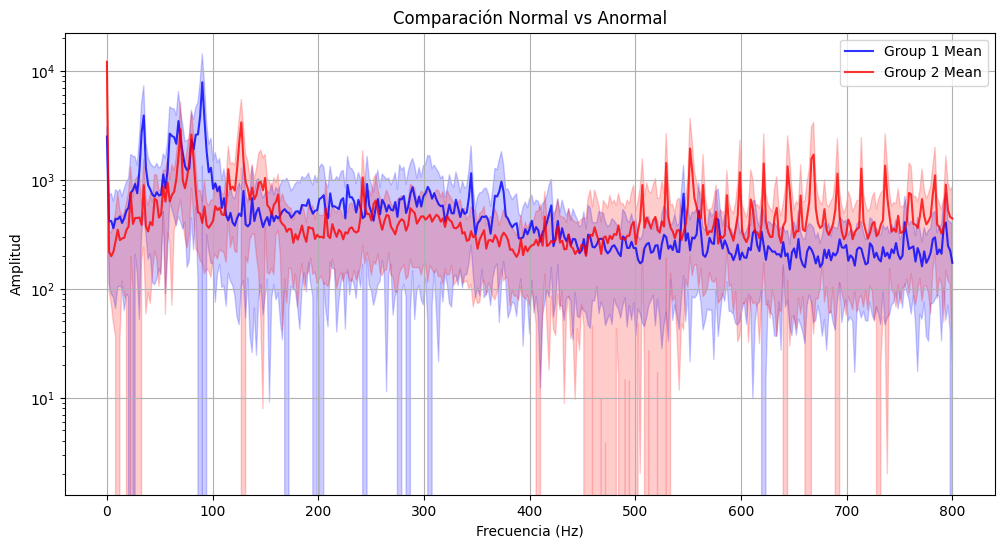

In [10]:
# Cargar señales anormales
abnormal_analyzer = FrequencyDistributionAnalyzer(fs=fs)
abnormal_dir = os.path.join(project_root, 'data', 'sin_correa', '2000_3')
abnormal_analyzer.load_signals_from_directory(abnormal_dir)

# Comparar distribuciones
analyzer.compare_groups(
    abnormal_analyzer,
    title="Comparación Normal vs Anormal"
)
plt.show()

## Análisis por Bandas de Frecuencia

Analicemos el comportamiento en bandas específicas de frecuencia.

<Figure size 1000x400 with 0 Axes>

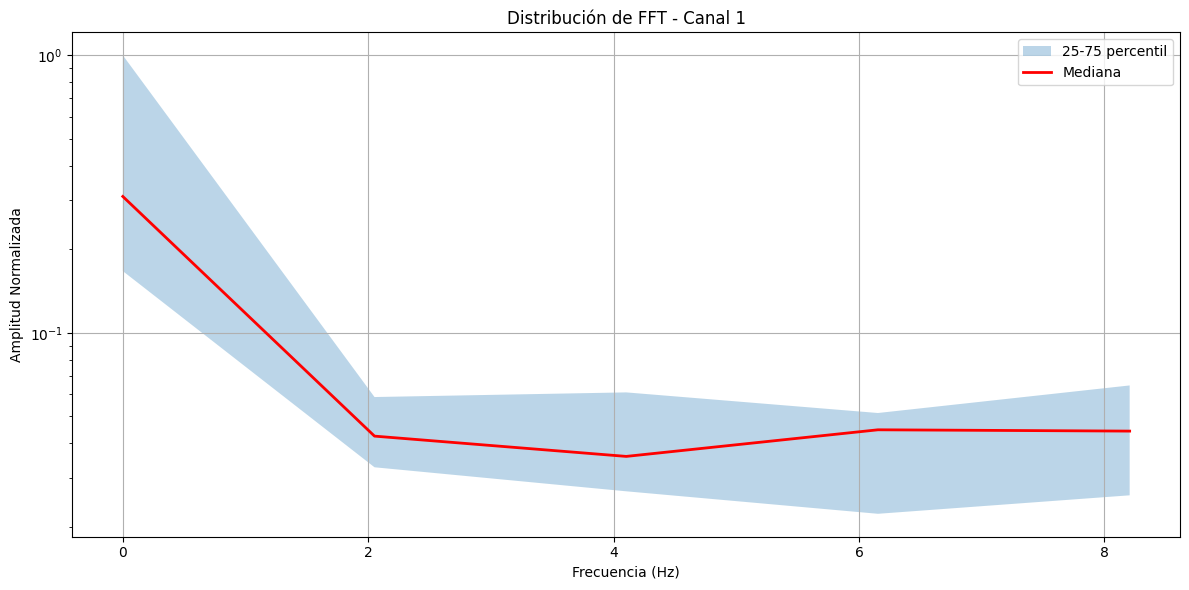

<Figure size 1000x400 with 0 Axes>

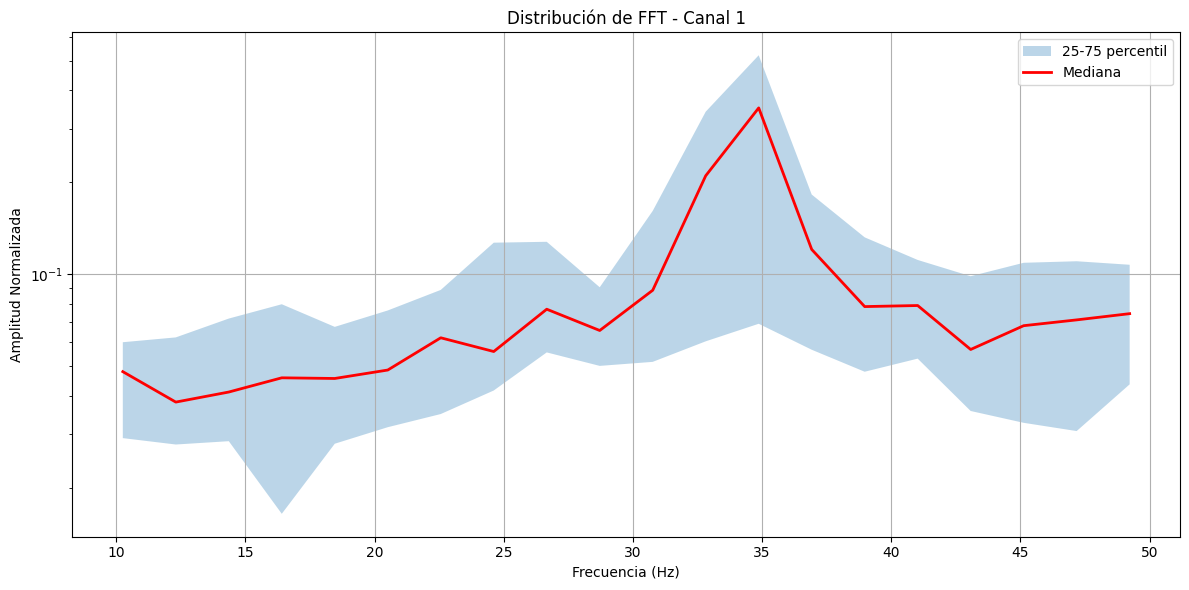

<Figure size 1000x400 with 0 Axes>

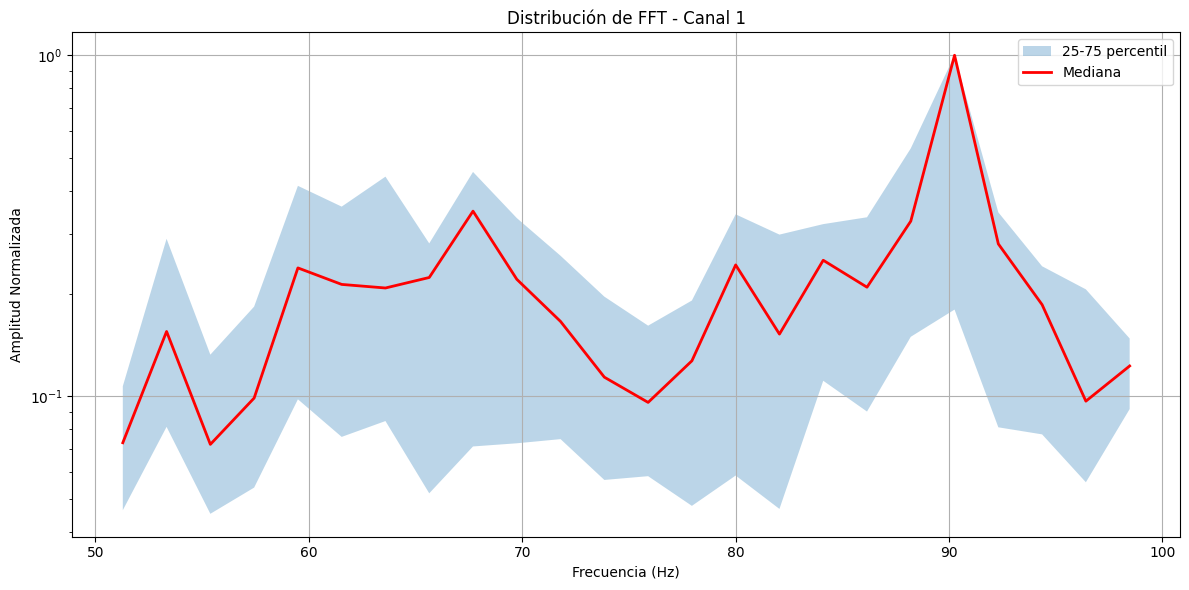

<Figure size 1000x400 with 0 Axes>

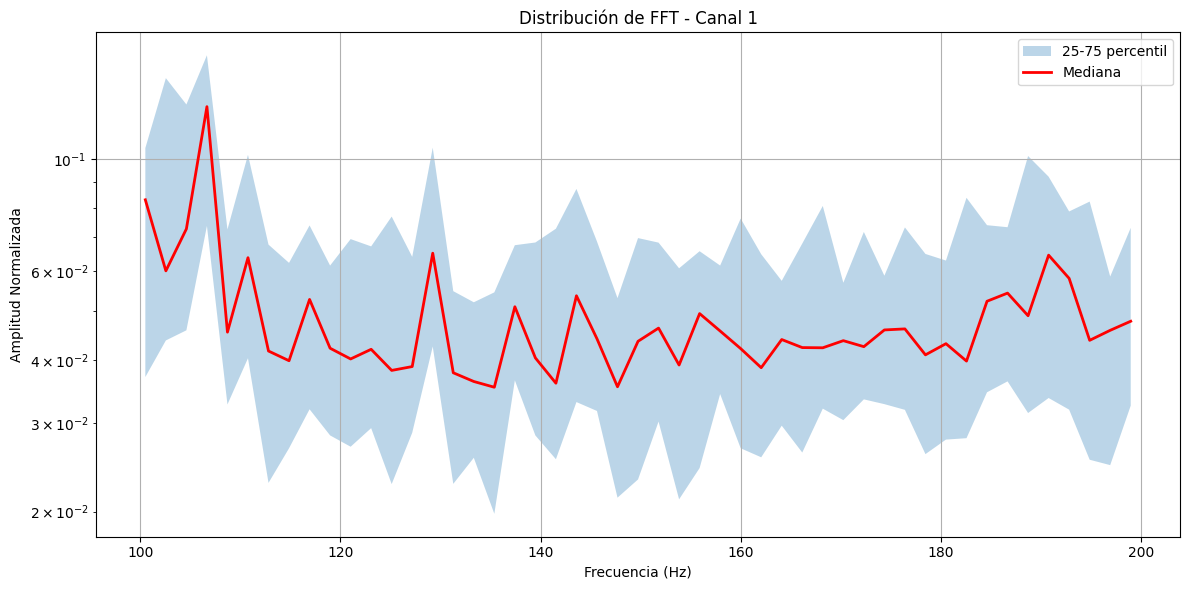

<Figure size 1000x400 with 0 Axes>

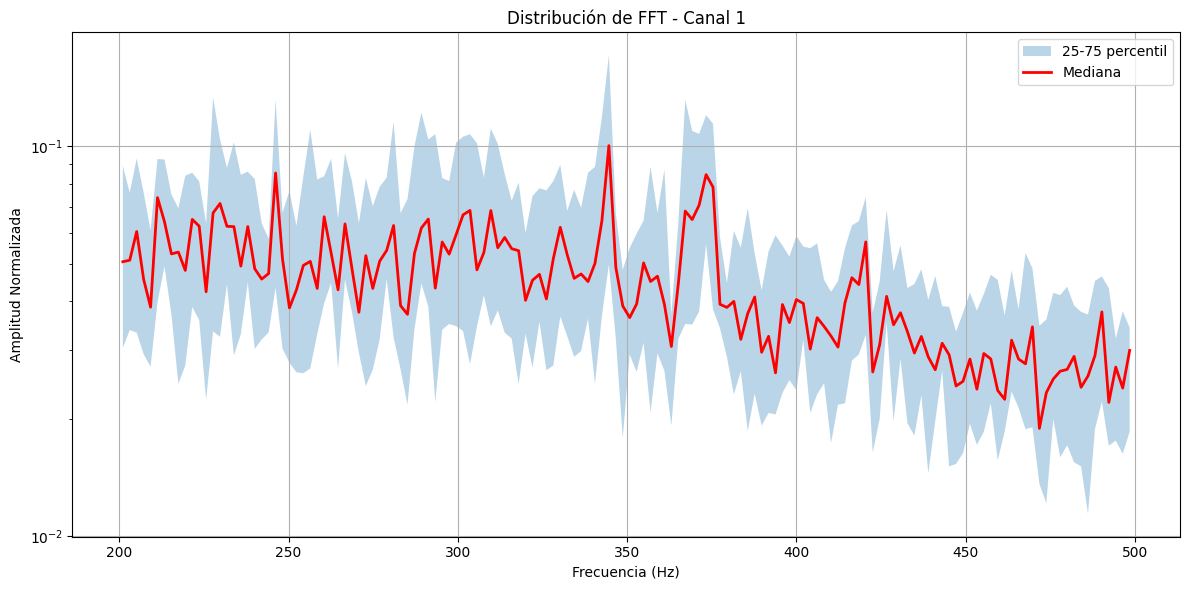

In [11]:
# Definir bandas de interés (ejemplo)
bands = [
    (0, 10),    # Muy baja frecuencia
    (10, 50),   # Baja frecuencia
    (50, 100),  # Media frecuencia
    (100, 200), # Alta frecuencia
    (200, 500)  # Muy alta frecuencia
]

# Visualizar cada banda
for band in bands:
    plt.figure(figsize=(10, 4))
    analyzer.plot_fft_distribution(
        freq_range=band,
        normalize=True,
    )
    plt.show()